# **NHẬP GÓI**

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import kagglehub
import os

# **DATA**

In [2]:
# Tải xuống phiên bản mới nhất của bộ dữ liệu
path = kagglehub.dataset_download("jocelyndumlao/cardiovascular-disease-dataset")

# Kiểm tra đường dẫn đến thư mục chứa file dữ liệu
print("Path to dataset files:\n", path)

# Đường dẫn đến thư mục chứa file dữ liệu
dataset_dir = os.path.join(path, 'Cardiovascular_Disease_Dataset')

# Liệt kê các file trong thư mục
print("\nCác file trong thư mục tải về:")
dataset_files = os.listdir(dataset_dir)
for file in dataset_files:
    print(file)


data_file_name = 'Cardiovascular_Disease_Dataset.csv'  # Lấy tên file cụ thể
data_file_path = os.path.join(dataset_dir, data_file_name)

# Kiểm tra xem file có tồn tại không
if os.path.exists(data_file_path):
    print("\nFile chứa dữ liệu đã được tải xuống thành công.\n")
    data = pd.read_csv(data_file_path, encoding='ISO-8859-1')

    # Hiển thị một số thông tin cơ bản về dữ liệu
    print("Thông tin bộ dữ liệu:\n")
    print(data.info())

    # Lưu dữ liệu vào file CSV trong thư mục hiện tại của Colab
    csv_file_path = 'heart_disease_data.csv'
    data.to_csv(csv_file_path, index=False)
    print(f"Dữ liệu đã được lưu vào file {csv_file_path}.\n")
else:
    print("Không tìm thấy file dữ liệu.")

100%|██████████| 411k/411k [00:00<00:00, 50.2MB/s]

Extracting files...
Path to dataset files:
 /root/.cache/kagglehub/datasets/jocelyndumlao/cardiovascular-disease-dataset/versions/1

Các file trong thư mục tải về:
Cardiovascular_Disease_Dataset.csv
Cardiovascular_Disease_Dataset_Description.pdf

File chứa dữ liệu đã được tải xuống thành công.

Thông tin bộ dữ liệu:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  

<ipython-input-3-d40c8ced4fee>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100.rename(columns=columns_mapping, inplace=True)
<ipython-input-3-d40c8ced4fee>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100['Giới tính'] = df_100['Giới tính'].replace({0: 'F', 1: 'M'})


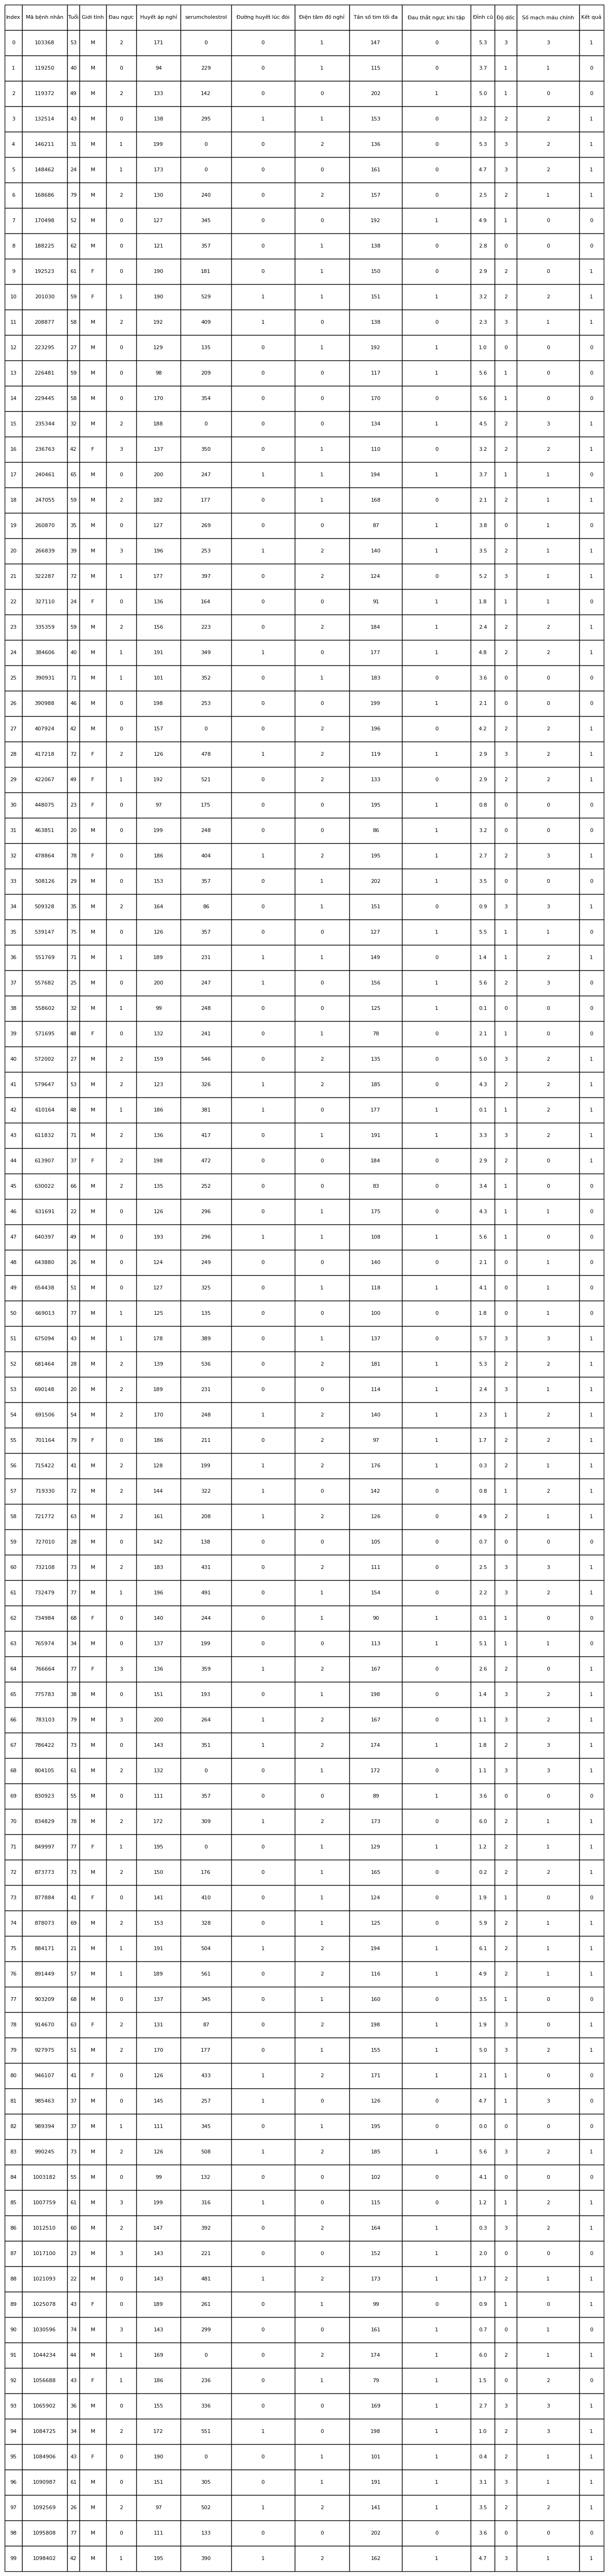

In [3]:
# Đọc dữ liệu từ file CSV
csv_file_path = 'heart_disease_data.csv'
df = pd.read_csv(csv_file_path)

# Lấy 100 dòng đầu tiên
df_100 = df.head(100)

# Thêm cột Index
df_100.insert(0, 'Index', range(0, len(df_100)))

# Đổi tên cột từ tiếng Anh sang tiếng Việt
columns_mapping = {
    'patientid': 'Mã bệnh nhân',
    'age': 'Tuổi',
    'gender': 'Giới tính',
    'chestpain': 'Đau ngực',
    'restingBP': 'Huyết áp nghỉ',
    'serumcholestrol': 'serumcholestrol',
    'fastingbloodsugar': 'Đường huyết lúc đói',
    'restingrelectro': 'Điện tâm đồ nghỉ',
    'maxheartrate': 'Tần số tim tối đa',
    'exerciseangia': 'Đau thắt ngực khi tập',
    'oldpeak': 'Đỉnh cũ',
    'slope': 'Độ dốc',
    'noofmajorvessels': 'Số mạch máu chính',
    'target': 'Kết quả'
}

# Đổi tên các cột trong DataFrame
df_100.rename(columns=columns_mapping, inplace=True)
# Đổi giá trị 0, 1 trong cột giới tính thành 'F' và 'M'
df_100['Giới tính'] = df_100['Giới tính'].replace({0: 'F', 1: 'M'})

# Vẽ bảng
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Tạo bảng từ DataFrame với 100 dòng đầu tiên
table_data = df_100.values
columns = df_100.columns

# Vẽ bảng
table_plot = ax.table(cellText=table_data, colLabels=columns, cellLoc='center', loc='center')
table_plot.auto_set_font_size(False)
table_plot.set_fontsize(8)
table_plot.scale(2.0, 1.8)

# Điều chỉnh độ rộng cột tự động
table_plot.auto_set_column_width([i for i in range(len(columns))])
table_plot.scale(5.0, 1.8)
plt.show()

# **Tách dữ liệu thành các đặc trưng (X) và nhãn (y)**

In [4]:
# Đọc dữ liệu từ file CSV
csv_file_path = 'heart_disease_data.csv'
df = pd.read_csv(csv_file_path)

# Lấy 100 dòng đầu tiên
df_100 = df.head(100)

# Tách dữ liệu thành đặc trưng (X) và nhãn mục tiêu (y)
X = df_100.drop(['target', 'patientid', 'gender'], axis=1)
y = df_100['target']

# In ra các dữ liệu
print("Dữ liệu X (Đặc trưng):")
print(X)
print("\nDữ liệu y (Mục tiêu):")
print(y)


Dữ liệu X (Đặc trưng):
    age  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0    53          2        171                0                  0   
1    40          0         94              229                  0   
2    49          2        133              142                  0   
3    43          0        138              295                  1   
4    31          1        199                0                  0   
..  ...        ...        ...              ...                ...   
95   43          0        190                0                  0   
96   61          0        151              305                  0   
97   26          2         97              502                  1   
98   77          0        111              133                  0   
99   42          1        195              390                  1   

    restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                 1           147              0      5.3      3   
1           

# **Tạo bootstrapped dataset**

In [5]:
X_resampled, y_resampled = resample(X, y, replace=True, n_samples=len(df), random_state=42)

# Tạo DataFrame từ X_resampled và thêm cột cho y_resampled
bootstrapped_df = pd.DataFrame(X_resampled, columns=X.columns).assign(Target=y_resampled)

print("Bootstrapped Dataset (X and y):", tabulate(bootstrapped_df, headers='keys', tablefmt='grid'))

Bootstrapped Dataset (X and y): +----+-------+-------------+-------------+-------------------+---------------------+-------------------+----------------+-----------------+-----------+---------+--------------------+----------+
|    |   age |   chestpain |   restingBP |   serumcholestrol |   fastingbloodsugar |   restingrelectro |   maxheartrate |   exerciseangia |   oldpeak |   slope |   noofmajorvessels |   Target |
+====+=======+=============+=============+===================+=====================+===================+================+=================+===========+=========+====================+==========+
| 51 |    43 |           1 |         178 |               389 |                   0 |                 1 |            137 |               0 |       5.7 |       3 |                  3 |        1 |
+----+-------+-------------+-------------+-------------------+---------------------+-------------------+----------------+-----------------+-----------+---------+--------------------+----------

# TẠO **TREE**

Tree 1:


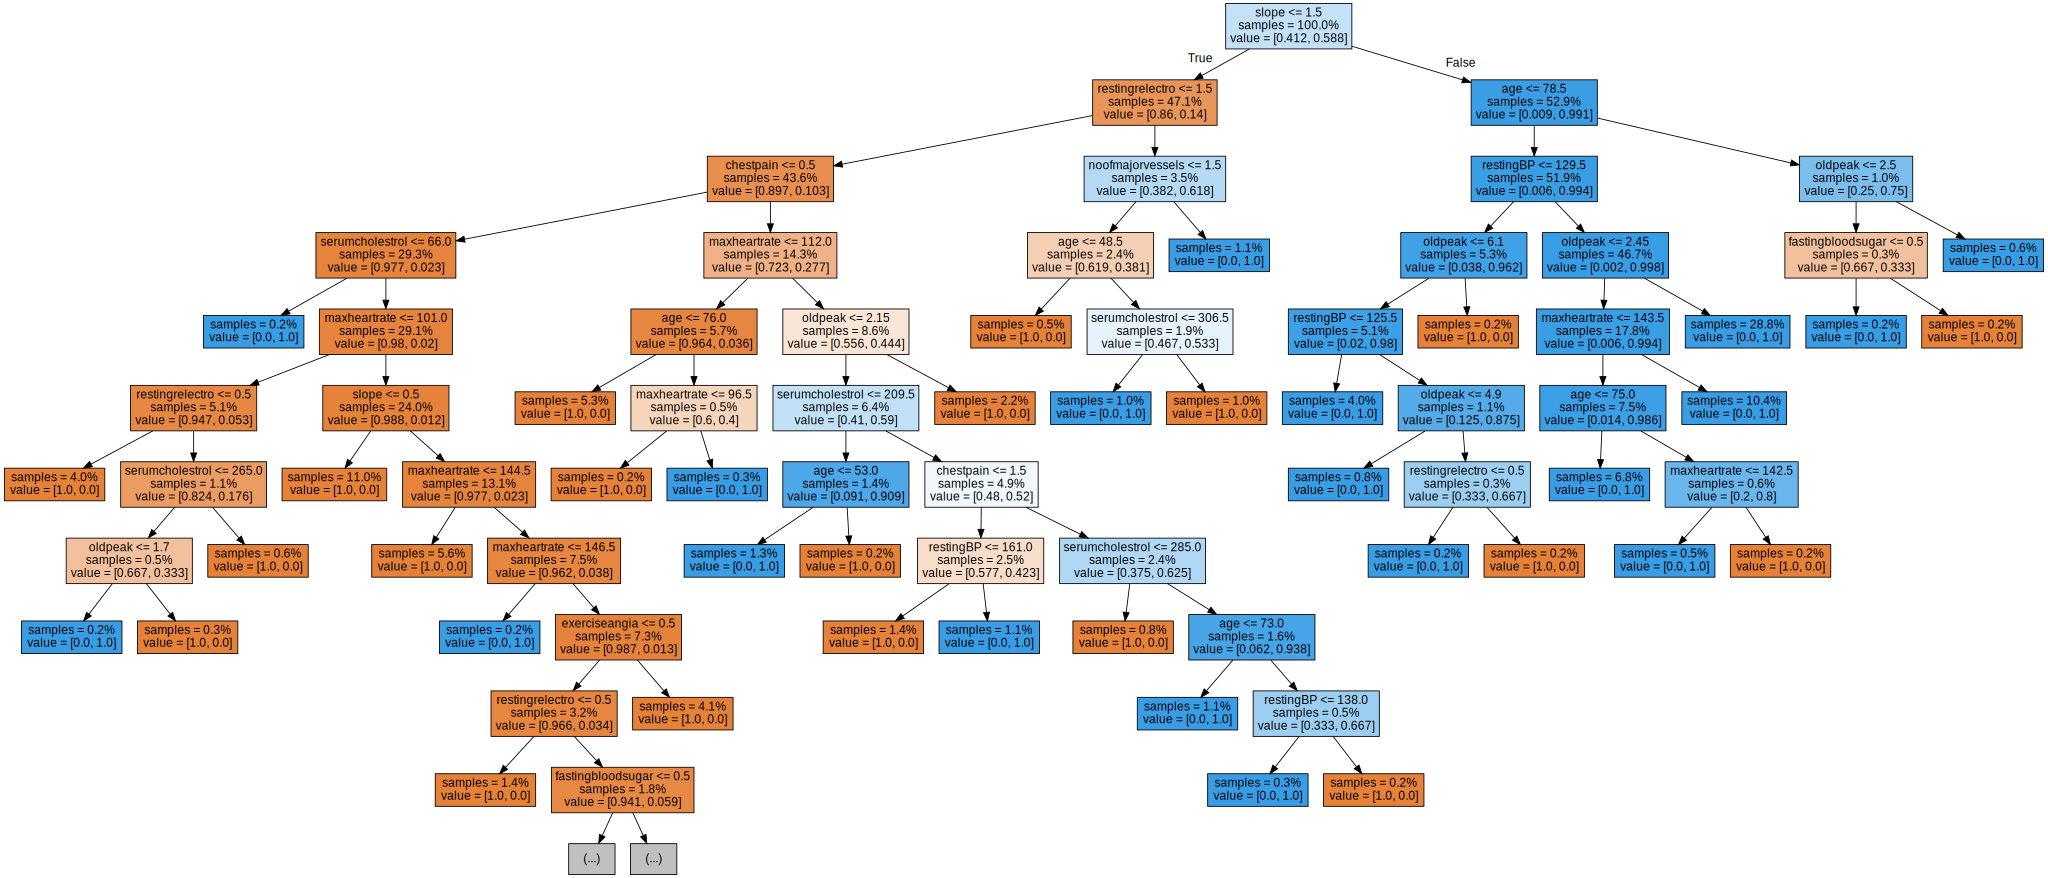

Tree 2:


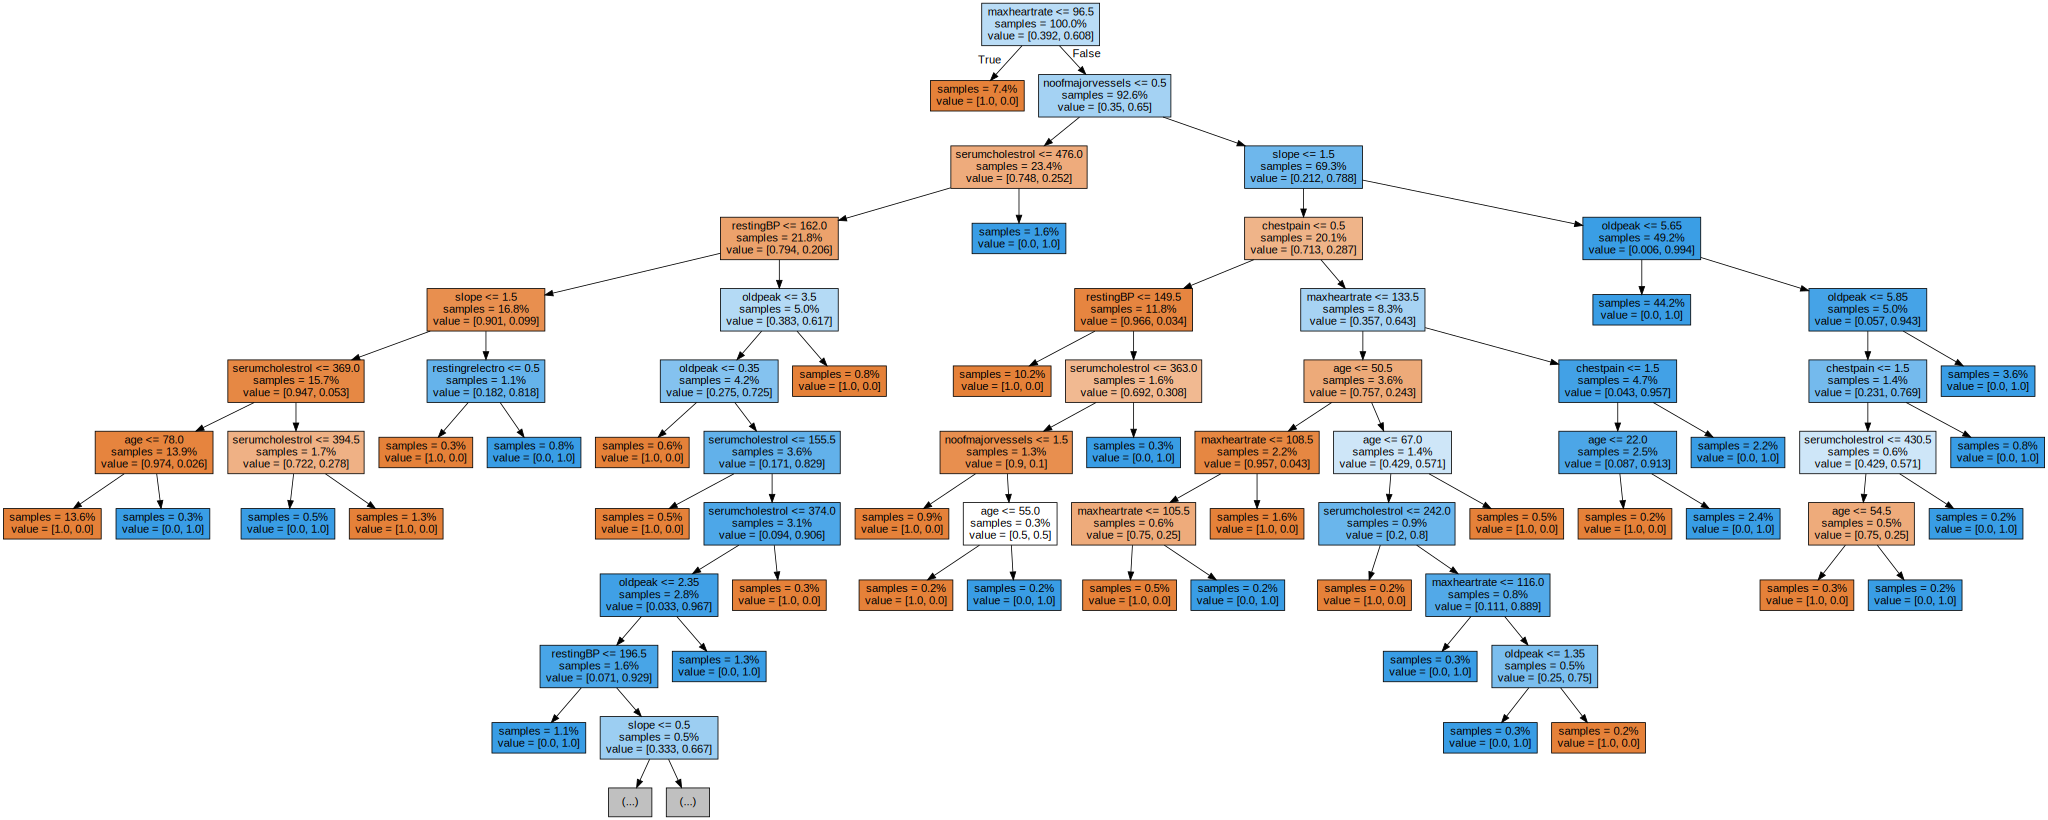

Tree 3:


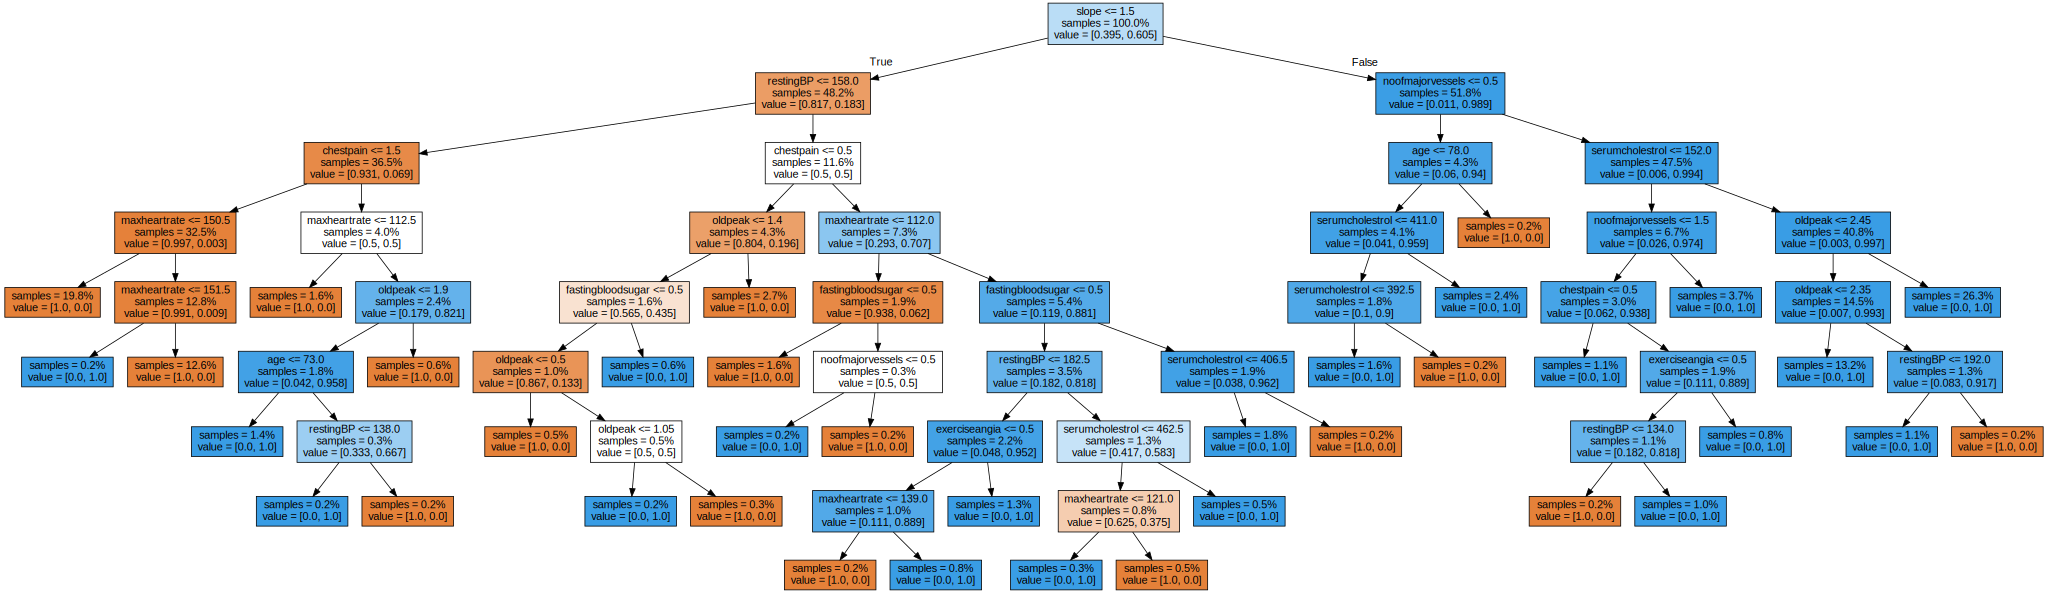

Tree 4:


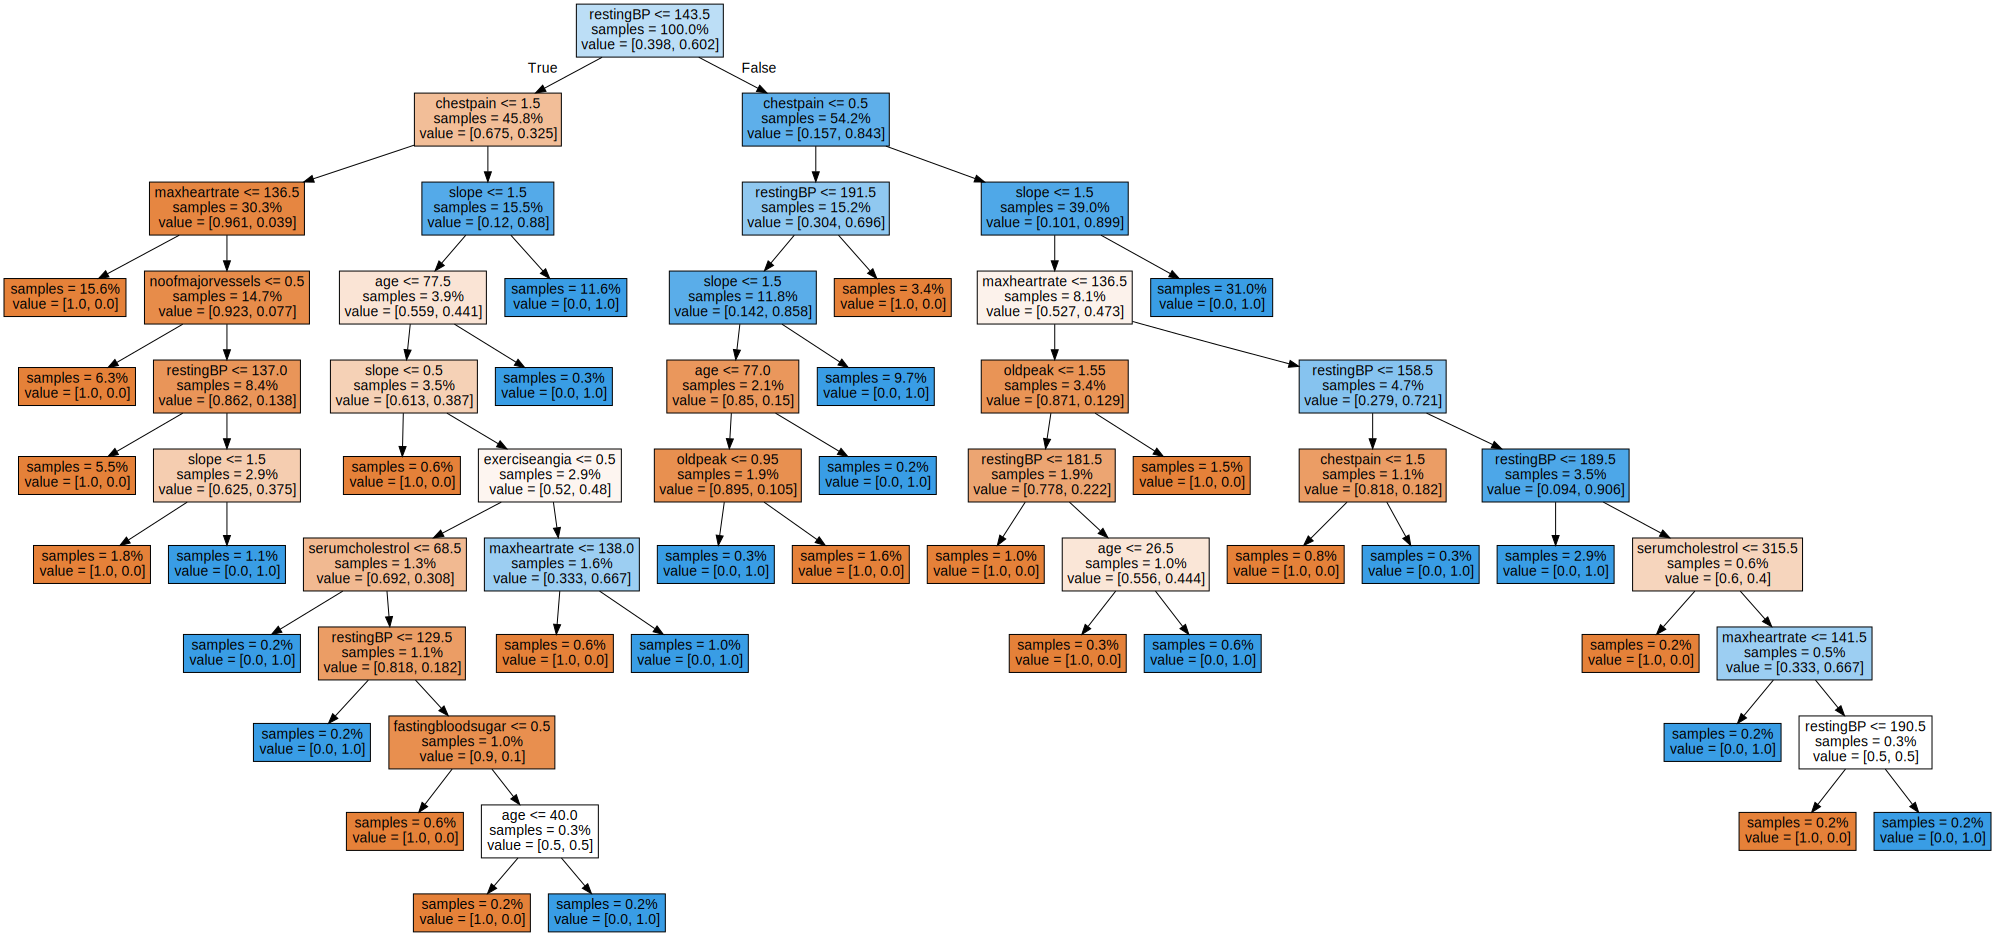

Tree 5:


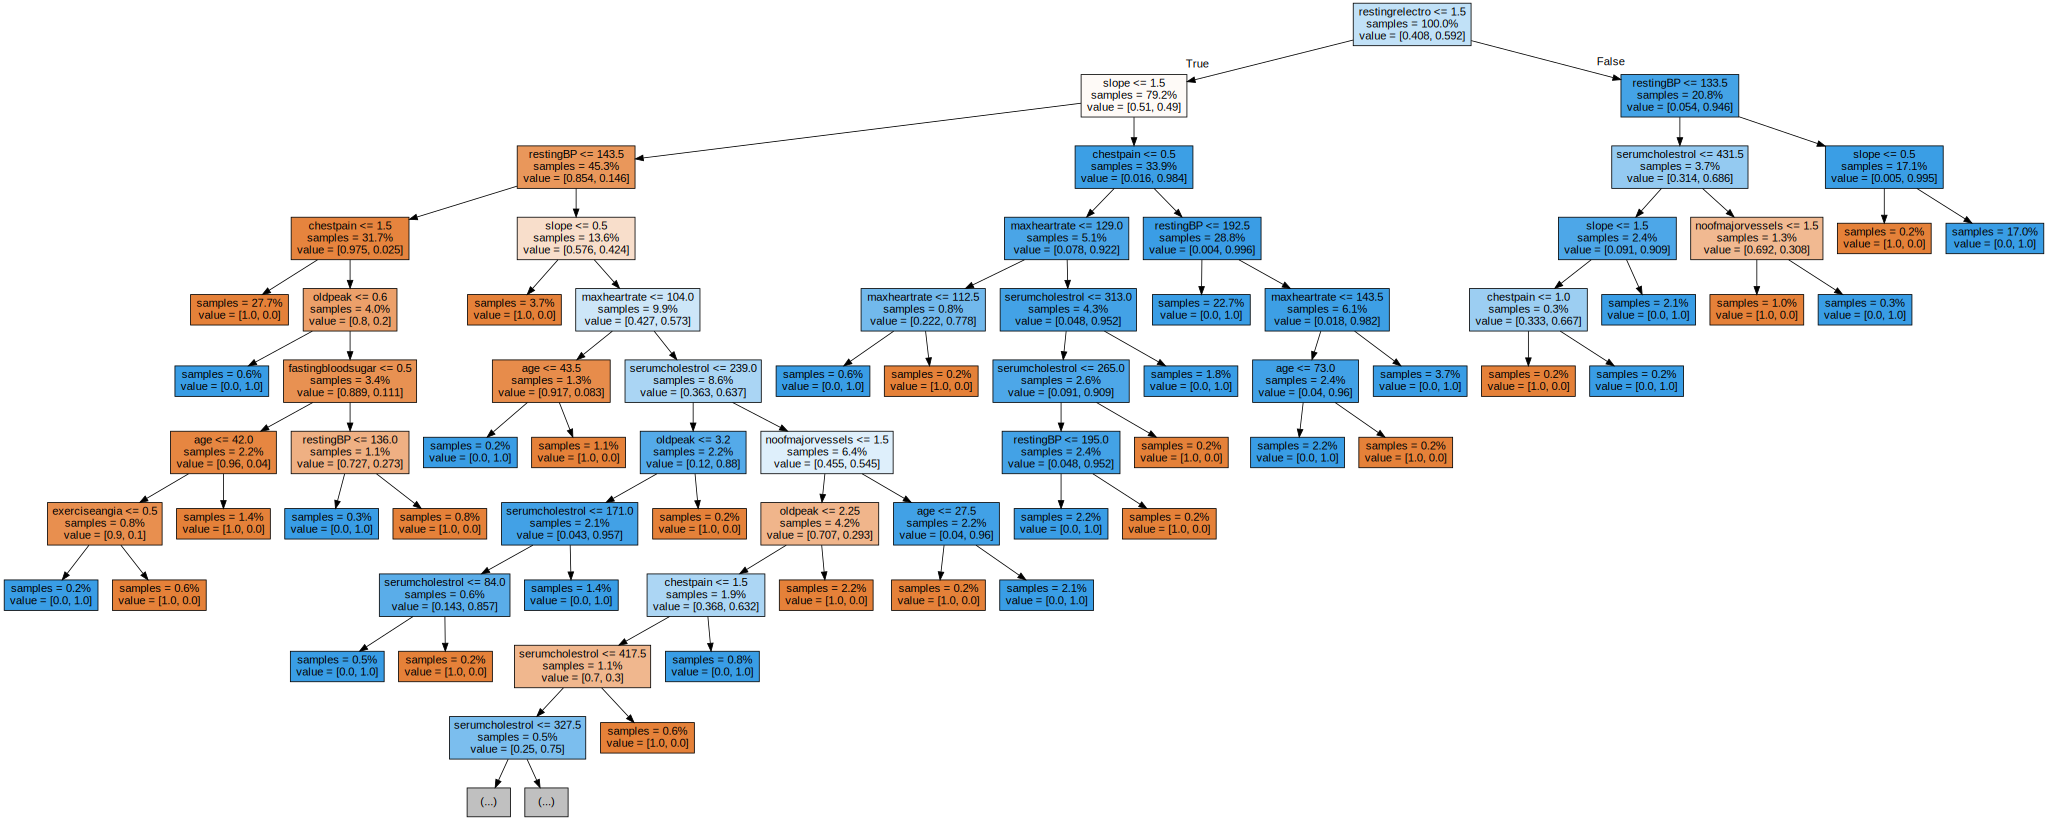

Tree 6:


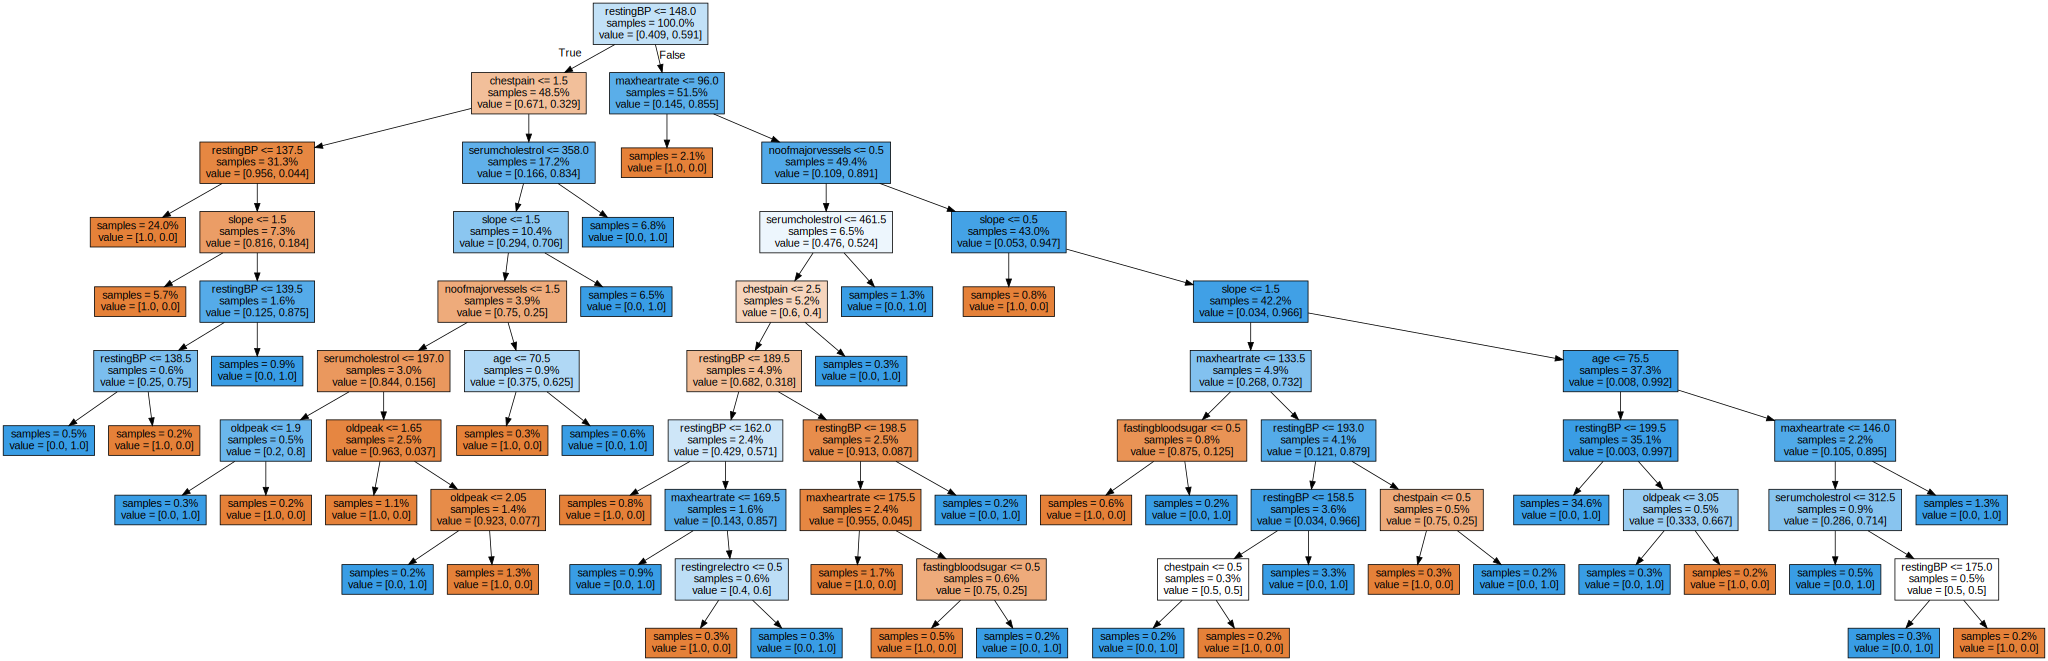

In [6]:
csv_file_path = 'heart_disease_data.csv'
df = pd.read_csv(csv_file_path)
df_100 = df.head(1000)

# Tách dữ liệu thành đặc trưng (X) và nhãn mục tiêu (y)
X = df_100.drop(['target', 'patientid','gender'], axis=1) # X chứa tất cả các cột ngoại trừ cột 'target'
y = df_100['target']  # y chứa giá trị của cột 'target'

# Tạo bootstrapped dataset bằng cách lấy mẫu lại (resample)
X_resampled, y_resampled = resample(X, y, replace=True, n_samples=len(df), random_state=42)
# Tạo DataFrame từ X_resampled và thêm cột cho y_resampled
bootstrapped_df = pd.DataFrame(X_resampled, columns=X.columns).assign(Target=y_resampled)

################################################################################

# Huấn luyện mô hình Random Forest với bootstrapped dataset
rf = RandomForestClassifier(n_estimators=1000, random_state=42) #tạo 1000 cây, random 42
rf.fit(X_resampled, y_resampled)


num_trees = 6
# Hiển thị n cây quyết định từ rừng
for i in range(num_trees):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X.columns, filled=True, max_depth=10, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    print(f"Tree {i+1}:")
    display(graph)

# ƯỚC TÍNH ĐỘ CHÍNH XÁC CỦA MÔ HÌNH FOREST VÀ TỪNG TREE
# Phân chia dữ liệu (Data Splitting)
để (test độ chính xác)

In [7]:
# Chia dữ liệu thành tập huấn luyện 70%
# tập kiểm tra test_size = 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #test size

# Chuyển đổi X_test thành NumPy array
X_test_array = X_test.to_numpy()

# Tính toán độ chính xác cho từng cây trong mô hình Random Forest
accuracies = [(i, accuracy_score(y_test, tree.predict(X_test_array))) for i, tree in enumerate(rf.estimators_)]
accuracies.sort(key=lambda x: x[1], reverse=True)

# In độ chính xác của từng cây
print("Độ chính xác của từng cây trong mô hình Random Forest:")
for index, acc in accuracies:
    print(f"Cây {index}: Độ chính xác = {acc * 100:.2f}%")

Độ chính xác của từng cây trong mô hình Random Forest:
Cây 638: Độ chính xác = 99.33%
Cây 823: Độ chính xác = 99.00%
Cây 171: Độ chính xác = 98.67%
Cây 100: Độ chính xác = 98.00%
Cây 150: Độ chính xác = 97.67%
Cây 185: Độ chính xác = 97.67%
Cây 230: Độ chính xác = 97.67%
Cây 406: Độ chính xác = 97.67%
Cây 445: Độ chính xác = 97.67%
Cây 557: Độ chính xác = 97.67%
Cây 787: Độ chính xác = 97.67%
Cây 868: Độ chính xác = 97.67%
Cây 103: Độ chính xác = 97.33%
Cây 115: Độ chính xác = 97.33%
Cây 162: Độ chính xác = 97.33%
Cây 194: Độ chính xác = 97.33%
Cây 221: Độ chính xác = 97.33%
Cây 238: Độ chính xác = 97.33%
Cây 718: Độ chính xác = 97.33%
Cây 761: Độ chính xác = 97.33%
Cây 791: Độ chính xác = 97.33%
Cây 881: Độ chính xác = 97.33%
Cây 891: Độ chính xác = 97.33%
Cây 905: Độ chính xác = 97.33%
Cây 26: Độ chính xác = 97.00%
Cây 42: Độ chính xác = 97.00%
Cây 61: Độ chính xác = 97.00%
Cây 99: Độ chính xác = 97.00%
Cây 118: Độ chính xác = 97.00%
Cây 125: Độ chính xác = 97.00%
Cây 127: Độ chính x

# **ĐỘ CHÍNH XÁC CỦA TỔNG THỂ**

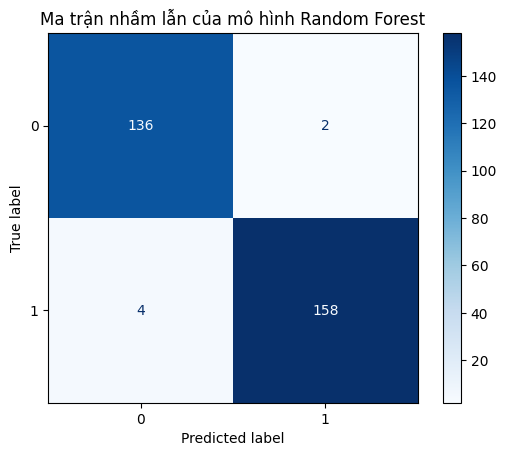

Độ chính xác của mô hình có thể được tính như sau:
Độ chính xác = Số lượng dự đoán đúng / Tổng số mẫu = 294/300 = 0.980 (98.00%)


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
# Tính toán nhãn cho tập kiểm tra và độ chính xác tổng thể
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Vẽ biểu đồ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Ma trận nhầm lẫn của mô hình Random Forest")
plt.show()

# Tính số lượng dự đoán đúng
total_correct = sum(y_pred == y_test)  # Tổng số dự đoán đúng
total_samples = len(y_test)  # Tổng số mẫu trong tập kiểm tra

# Tính độ chính xác tổng thể
overall_accuracy = total_correct / total_samples  # Độ chính xác tổng thể
print(f"Độ chính xác của mô hình có thể được tính như sau:\n"
      f"Độ chính xác = Số lượng dự đoán đúng / Tổng số mẫu = {total_correct}/{total_samples} = {overall_accuracy:.3f} ({overall_accuracy * 100:.2f}%)")


# BIỂU ĐỒ CỘT ĐỘ CHÍNH XÁC TREES

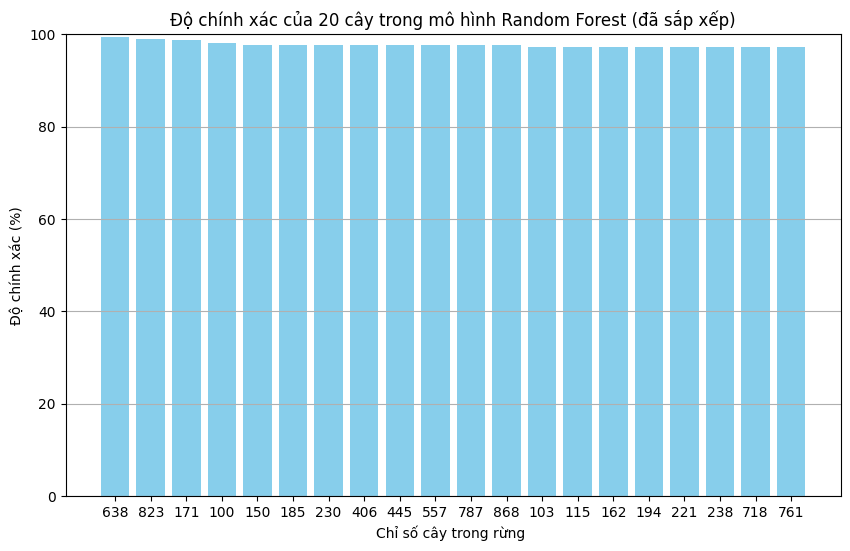

In [9]:
# Lấy độ chính xác cho tất cả các cây trong rừng
accuracies = []
for i in range(len(rf.estimators_)):  # Duyệt qua tất cả các cây
    tree = rf.estimators_[i]
    y_pred_tree = tree.predict(X_test.values)  # Chuyển đổi X_test thành numpy array
    acc = accuracy_score(y_test, y_pred_tree)
    accuracies.append(acc)

# Sắp xếp độ chính xác và giữ lại chỉ số của các cây
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_accuracies = [accuracies[i] * 100 for i in sorted_indices]  # Nhân với 100 để chuyển đổi thành phần trăm

# Chọn n cây có độ chính xác cao nhất
top_n = 20

top_indices = sorted_indices[:top_n]
top_accuracies = sorted_accuracies[:top_n]

# Lưu chỉ số cây có độ chính xác cao nhất vào mảng riêng để sử dụng sau
best_tree_indices = sorted_indices[:len(accuracies)]
best_tree_indices_dat=sorted_indices[:len(accuracies)]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_accuracies, color='skyblue')
plt.xlabel('Chỉ số cây trong rừng ')
plt.ylabel('Độ chính xác (%)')  # Đổi nhãn trục y thành phần trăm
plt.title(f'Độ chính xác của {top_n} cây trong mô hình Random Forest (đã sắp xếp)')
plt.xticks(range(top_n), top_indices)  # Đặt nhãn cho trục x là chỉ số cây đã sắp xếp
plt.ylim(0, 100)  # Đặt giới hạn trục y từ 0 đến 100
plt.grid(axis='y')
plt.show()

# **DATA TEST**

In [10]:
# khoảng cách xa là lấy dòng từ file bỏ vào để test target
data_manual = {
    'age': [45, 56, 67, 34, 23,                      43, 43, 51],
    'chestpain': [0, 1, 1, 0, 1,                     1, 0, 0],
    'restingBP': [130, 140, 150, 120, 110,           178, 186, 127],
    'serumcholestrol': [200, 250, 240, 180, 170,     389, 236, 325],
    'fastingbloodsugar': [0, 1, 0, 1, 0,             0, 1, 0],
    'restingrelectro': [0, 1, 0, 0, 1,               1, 1, 1],
    'maxheartrate': [150, 160, 170, 140, 130,        137, 79, 118],
    'exerciseangia': [1, 0, 1, 0, 1,                 1, 0, 1],
    'oldpeak': [2.3, 1.5, 2.0, 1.0, 0.5,             3, 1.5, 4.1],
    'slope': [2, 1, 2, 1, 0,                         3, 0, 0],
    'noofmajorvessels': [0, 1, 1, 0, 1,              3, 2, 1]
}
# Chuyển đổi thành DataFrame
test_data_manual = pd.DataFrame(data_manual)

# Hiển thị DataFrame
print(test_data_manual)

   age  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   45          0        130              200                  0   
1   56          1        140              250                  1   
2   67          1        150              240                  0   
3   34          0        120              180                  1   
4   23          1        110              170                  0   
5   43          1        178              389                  0   
6   43          0        186              236                  1   
7   51          0        127              325                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                0           150              1      2.3      2   
1                1           160              0      1.5      1   
2                0           170              1      2.0      2   
3                0           140              0      1.0      1   
4                1           130              1     

# **TEST 6 TREE NGẪU NHIÊN**

In [11]:
number_rd_tree = 6
# 1. Chọn number_rd_tree cây ngẫu nhiên từ mô hình
X_test_new = test_data_manual  # Sử dụng dữ liệu thử nghiệm đã nhập tay
random_trees_indices = random.sample(range(len(rf.estimators_)), number_rd_tree)
tree_results = []  # Danh sách lưu kết quả từng cây

# Dự đoán cho mỗi hàng trong tập dữ liệu kiểm tra
for index, row in X_test_new.iterrows():  # Lặp qua từng hàng
    row_results = []  # Lưu kết quả cho từng hàng
    for i in random_trees_indices:
        tree = rf.estimators_[i]
        y_pred_tree = tree.predict(row.values.reshape(1, -1))  # Dự đoán cho từng mẫu
        prediction = y_pred_tree[0]  # Lưu dự đoán đầu tiên
        result = "Yes" if prediction == 1 else "No"
        row_results.append(result)  # Lưu kết quả dự đoán cho hàng này

    # Tính tổng số lần dự đoán "Yes" và "No" cho hàng này
    total_yes = row_results.count("Yes")
    total_no = row_results.count("No")

    # In kết quả cho hàng này
    print(f"\nDự đoán cho mẫu {index}:")
    for i, result in zip(random_trees_indices, row_results):
        print(f"Cây {i}: {result}")

    # Kết quả dự đoán cho hàng này
    print("KẾT QUẢ:", str(total_yes) + " Yes - ", str(total_no) + " No")

    # Cung cấp kết luận cho hàng này
    if total_yes > total_no:
        print("Chuẩn đoán: Có khả năng mắc bệnh tim mạch.")
    else:
        print("Chuẩn đoán: Không mắc bệnh tim mạch.")



Dự đoán cho mẫu 0:
Cây 413: Yes
Cây 733: Yes
Cây 642: Yes
Cây 871: No
Cây 485: Yes
Cây 255: Yes
KẾT QUẢ: 5 Yes -  1 No
Chuẩn đoán: Có khả năng mắc bệnh tim mạch.

Dự đoán cho mẫu 1:
Cây 413: Yes
Cây 733: Yes
Cây 642: No
Cây 871: No
Cây 485: Yes
Cây 255: No
KẾT QUẢ: 3 Yes -  3 No
Chuẩn đoán: Không mắc bệnh tim mạch.

Dự đoán cho mẫu 2:
Cây 413: Yes
Cây 733: Yes
Cây 642: Yes
Cây 871: Yes
Cây 485: Yes
Cây 255: Yes
KẾT QUẢ: 6 Yes -  0 No
Chuẩn đoán: Có khả năng mắc bệnh tim mạch.

Dự đoán cho mẫu 3:
Cây 413: No
Cây 733: No
Cây 642: No
Cây 871: No
Cây 485: No
Cây 255: No
KẾT QUẢ: 0 Yes -  6 No
Chuẩn đoán: Không mắc bệnh tim mạch.

Dự đoán cho mẫu 4:
Cây 413: No
Cây 733: No
Cây 642: No
Cây 871: No
Cây 485: No
Cây 255: No
KẾT QUẢ: 0 Yes -  6 No
Chuẩn đoán: Không mắc bệnh tim mạch.

Dự đoán cho mẫu 5:
Cây 413: Yes
Cây 733: Yes
Cây 642: Yes
Cây 871: Yes
Cây 485: Yes
Cây 255: Yes
KẾT QUẢ: 6 Yes -  0 No
Chuẩn đoán: Có khả năng mắc bệnh tim mạch.

Dự đoán cho mẫu 6:
Cây 413: Yes
Cây 733: Yes
Cây 

# **TEST 6 TREE CÓ ĐỘ CHÍNH XÁC CAO NHẤT**

In [12]:
# Sử dụng tập dữ liệu kiểm tra đã nhập tay
X_test_new = test_data_manual  # Dữ liệu kiểm tra thủ công

# Chọn n cây có độ chính xác cao nhất từ mảng best_tree_indices
best_tree_indices_top = best_tree_indices[:6]  # Lấy n cây có độ chính xác cao nhất
tree_results = []  # Danh sách lưu kết quả từng cây

# Dự đoán cho mỗi hàng trong tập dữ liệu kiểm tra
for index, row in X_test_new.iterrows():  # Lặp qua từng hàng
    row_results = []  # Lưu kết quả cho từng hàng
    for i in best_tree_indices_top:
        tree = rf.estimators_[i]  # Lấy cây từ chỉ số best_tree_indices
        y_pred_tree = tree.predict(row.values.reshape(1, -1))  # Dự đoán cho từng mẫu
        prediction = y_pred_tree[0]  # Lưu dự đoán đầu tiên
        result = "Yes" if prediction == 1 else "No"
        row_results.append(result)  # Lưu kết quả dự đoán cho hàng này

    # Tính tổng số lần dự đoán "Yes" và "No" cho hàng này
    total_yes = row_results.count("Yes")
    total_no = row_results.count("No")

    # In kết quả cho hàng này
    print(f"\nDự đoán cho mẫu {index}:")
    for i, result in zip(best_tree_indices_top, row_results):
        print(f"Cây {i}: {result}")

    # Kết quả dự đoán cho hàng này
    print("KẾT QUẢ:", str(total_yes) + " Yes - ", str(total_no) + " No")

    # Cung cấp kết luận cho hàng này
    if total_yes > total_no:
        print("Chuẩn đoán: Có khả năng mắc bệnh tim mạch.")
    else:
        print("Chuẩn đoán: Không mắc bệnh tim mạch.")



Dự đoán cho mẫu 0:
Cây 638: Yes
Cây 823: No
Cây 171: Yes
Cây 100: Yes
Cây 150: No
Cây 185: Yes
KẾT QUẢ: 4 Yes -  2 No
Chuẩn đoán: Có khả năng mắc bệnh tim mạch.

Dự đoán cho mẫu 1:
Cây 638: No
Cây 823: Yes
Cây 171: No
Cây 100: No
Cây 150: Yes
Cây 185: No
KẾT QUẢ: 2 Yes -  4 No
Chuẩn đoán: Không mắc bệnh tim mạch.

Dự đoán cho mẫu 2:
Cây 638: Yes
Cây 823: Yes
Cây 171: Yes
Cây 100: Yes
Cây 150: Yes
Cây 185: Yes
KẾT QUẢ: 6 Yes -  0 No
Chuẩn đoán: Có khả năng mắc bệnh tim mạch.

Dự đoán cho mẫu 3:
Cây 638: No
Cây 823: No
Cây 171: No
Cây 100: No
Cây 150: No
Cây 185: No
KẾT QUẢ: 0 Yes -  6 No
Chuẩn đoán: Không mắc bệnh tim mạch.

Dự đoán cho mẫu 4:
Cây 638: No
Cây 823: No
Cây 171: No
Cây 100: No
Cây 150: No
Cây 185: No
KẾT QUẢ: 0 Yes -  6 No
Chuẩn đoán: Không mắc bệnh tim mạch.

Dự đoán cho mẫu 5:
Cây 638: Yes
Cây 823: Yes
Cây 171: Yes
Cây 100: Yes
Cây 150: Yes
Cây 185: Yes
KẾT QUẢ: 6 Yes -  0 No
Chuẩn đoán: Có khả năng mắc bệnh tim mạch.

Dự đoán cho mẫu 6:
Cây 638: No
Cây 823: Yes
Cây 171

# **Dự đoán dữ liệu bị thiếu nhờ rừng ngẫu nhiên**
# **(Missing data)**

Dữ liệu thử nghiệm trước khi xử lý:
   age  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   23          1        110              170                  0   
1   43          1        178              389                  0   
2   43          0        186              236                  1   
3   51          0        127              325                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           130            1.0      0.5      0   
1                1           137            1.0      3.0      3   
2                1            79            0.0      1.5      0   
3                1           118            NaN      4.1      0   

   noofmajorvessels  target  
0                 1       0  
1                 3       0  
2                 2       1  
3                 1       0  

Dữ liệu thử nghiệm sau khi xử lý:
   age  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   23          1        110      

<ipython-input-13-7439646eda26>:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_manual['exerciseangia'].fillna(median_value, inplace=True)


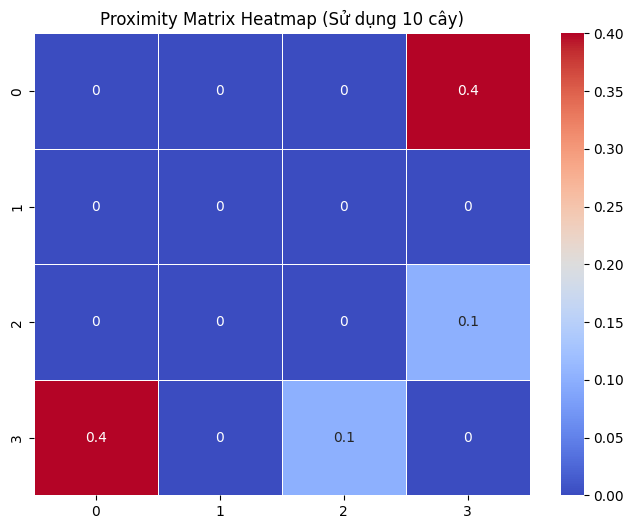

step1:
Công thức tính Weight yes/no:
Weight yes/no = Proximity yes/no : Total_proximities

Proximity Yes: 0.40
Proximity No: 0.10
Total_proximities: 0.50

Weight Yes: 0.40 : 0.50 = 0.80
Weight No: 0.10 : 0.50 = 0.20

step2:
Công thức tính Weighted Frequency:
Weighted Frequency Yes = Total Yes * Weight Yes
Weighted Frequency No = Total No * Weight No

Total Yes: 0.67
Total No: 0.33
Weighted Frequency Yes = 0.67 * 0.80 = 0.53
Weighted Frequency No = 0.33 * 0.20 = 0.07

Dự đoán cho 'Blocked Arteries': Yes

Tỷ lệ Weighted Frequency cho 'Yes': 0.53
Tỷ lệ Weighted Frequency cho 'No': 0.07
Dự đoán cho 'Blocked Arteries': Yes


In [13]:
#step 1:Tạo dữ liệu thử nghiệm
data_manual = {
    'age': [23, 43, 43, 51],
    'chestpain': [1, 1, 0, 0],
    'restingBP': [110, 178, 186, 127],
    'serumcholestrol': [170, 389, 236, 325],
    'fastingbloodsugar': [0, 0, 1, 0],
    'restingrelectro': [1, 1, 1, 1],
    'maxheartrate': [130, 137, 79, 118],
    'exerciseangia': [1, 1, 0, np.nan],# Giá trị NaN cho mẫu thứ 4
    'oldpeak': [0.5, 3, 1.5, 4.1],
    'slope': [0, 3, 0, 0],
    'noofmajorvessels': [1, 3, 2, 1],
}

# Thêm cột target
targets = [0, 0, 1, 0]
data_manual['target'] = targets

# Chuyển đổi thành DataFrame
test_data_manual = pd.DataFrame(data_manual)

# Hiển thị DataFrame
print("Dữ liệu thử nghiệm trước khi xử lý:")
print(test_data_manual)
################################################################################
#step 2:Xử lý giá trị NaN trong cột 'exerciseangia'

# Tính trung vị cho 'exerciseangia' dựa trên target là 0 hoặc 1
median_value = test_data_manual[test_data_manual['target'].isin([0, 1])]['exerciseangia'].median()

# Tính toán weighted frequency cho "Yes" và "No"
# Bước 1: Lọc dữ liệu không có NaN
filtered_data = test_data_manual.dropna(subset=['exerciseangia'])

# Bước 2: Tính tỷ lệ
total_yes = len(filtered_data[filtered_data['exerciseangia'] == 1]) / len(filtered_data)
total_no = len(filtered_data[filtered_data['exerciseangia'] == 0]) / len(filtered_data)

# Thay thế NaN bằng giá trị trung vị
test_data_manual['exerciseangia'].fillna(median_value, inplace=True)

# Hiển thị DataFrame sau khi xử lý
print("\nDữ liệu thử nghiệm sau khi xử lý:")
print(test_data_manual)
################################################################################
#step 3:Chọn số lượng cây ngẫu nhiên

number_rd_tree = 10  # Số lượng cây ngẫu nhiên chọn
X_test_new = test_data_manual.drop(columns='target')  # Sử dụng dữ liệu thử nghiệm đã nhập tay mà không có cột 'target'
random_trees_indices = random.sample(range(len(rf.estimators_)), number_rd_tree)
################################################################################
#step 4:Khởi tạo ma trận proximity

#ma trận 0 có kích thước (4, 4) cho 4 mẫu
proximity_matrix = np.zeros((len(X_test_new), len(X_test_new)))
################################################################################
#step 5:Dự đoán và tính toán proximity matrix


for i in random_trees_indices:  # Duyệt qua từng cây ngẫu nhiên
    tree = rf.estimators_[i]

    # Lấy nút lá mà mỗi mẫu dừng lại trong cây hiện tại
    leaf_nodes = tree.apply(X_test_new.values)  # Áp dụng tất cả các mẫu vào cây

    # So sánh từng cặp mẫu
    for index1 in range(len(X_test_new)):
        for index2 in range(index1 + 1, len(X_test_new)):  # Duyệt qua các cặp mẫu
            if leaf_nodes[index1] == leaf_nodes[index2]:  # Kiểm tra xem chúng có cùng dừng ở 1 nút lá không
                # Nếu đúng, tăng giá trị trong proximity matrix
                proximity_matrix[index1][index2] += 1
                proximity_matrix[index2][index1] += 1

# Chia giá trị proximity matrix cho số lượng cây để tạo tỷ lệ
proximity_matrix_percentage = proximity_matrix / number_rd_tree

# Hiển thị thông tin tổng số cây đã sử dụng
print(f"\nTổng số cây đã sử dụng: {number_rd_tree}")
print("Proximity Matrix đã được chia tỷ lệ phần trăm:")
print(proximity_matrix_percentage)

# Vẽ proximity matrix với seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(proximity_matrix_percentage, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title(f'Proximity Matrix Heatmap (Sử dụng {number_rd_tree} cây)')
plt.show()


# Lấy giá trị exerciseangia từ DataFrame test_data_manual
exerciseangia = test_data_manual['exerciseangia'].tolist()  # Chuyển đổi cột thành danh sách

# Tính proximity cho "Yes" và "No"
proximity_yes = 0
proximity_no = 0

# Duyệt qua tất cả các mẫu
for index in range(len(exerciseangia)):
    if exerciseangia[index] == 1:
        # Nếu exerciseangia là 1, cộng các giá trị từ hàng của mẫu
        proximity_yes += proximity_matrix_percentage[index][len(exerciseangia) - 1].sum()  # Cộng tất cả giá trị trong hàng
    else:
        # Nếu exerciseangia là 0, cộng giá trị từ hàng mẫu
        proximity_no += proximity_matrix_percentage[index][len(exerciseangia) - 1].sum()  # Cộng tất cả giá trị trong hàng

# Tổng proximity
total_proximities = proximity_yes + proximity_no
# Tính weight cho "Yes" và "No"
weight_yes = proximity_yes / total_proximities if total_proximities != 0 else 0
weight_no = proximity_no / total_proximities if total_proximities != 0 else 0

# Tính weighted frequency cho "Yes" và "No"
weighted_frequency_yes = total_yes * weight_yes
weighted_frequency_no = total_no * weight_no

# So sánh và đưa ra quyết định
if weighted_frequency_yes > weighted_frequency_no:
    prediction = "Yes"
else:
    prediction = "No"

# Tính và in ra Weighted Frequency
print("step1:")
print("Công thức tính Weight yes/no:")
print("Weight yes/no = Proximity yes/no : Total_proximities")
print(f"\nProximity Yes: {proximity_yes:.2f}")
print(f"Proximity No: {proximity_no:.2f}")
print(f"Total_proximities: {total_proximities:.2f}\n")
print(f"Weight Yes: {proximity_yes:.2f} : {total_proximities:.2f} = {weight_yes:.2f}")
print(f"Weight No: {proximity_no:.2f} : {total_proximities:.2f} = {weight_no:.2f}")

print("\nstep2:")
print("Công thức tính Weighted Frequency:")
print("Weighted Frequency Yes = Total Yes * Weight Yes")
print("Weighted Frequency No = Total No * Weight No\n")
print(f"Total Yes: {total_yes:.2f}")
print(f"Total No: {total_no:.2f}")
print(f"Weighted Frequency Yes = {total_yes:.2f} * {weight_yes:.2f} = {weighted_frequency_yes:.2f}")
print(f"Weighted Frequency No = {total_no:.2f} * {weight_no:.2f} = {weighted_frequency_no:.2f}")

# In ra dự đoán
print(f"\nDự đoán cho 'Blocked Arteries': {prediction}")

print(f"\nTỷ lệ Weighted Frequency cho 'Yes': {weighted_frequency_yes:.2f}")
print(f"Tỷ lệ Weighted Frequency cho 'No': {weighted_frequency_no:.2f}")
print(f"Dự đoán cho 'Blocked Arteries': {prediction}")